# **Exploratory Analysis of Geyser Dataset**

**Author:** Aanandya Mittal  
**Date:** 2/17/2024

## Purpose

The seaborn geyser dataset found at https://github.com/mwaskom/seaborn-data/blob/master/geyser.csv contains information about geyser characteristics:

This dataset is used for statistical analysis projects. This project is meant to hone our skill for performing exploratory data analysis and presenting data stories using Jupyter.  

Overall this analysis will investigate the differences between long and short geysers, as well as the difference between waiting and duration time of geysers.

### **Importing libraries**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### **Loading the Geyser dataset**

This dataset has 3 variables:  
* duration - The length the geyser lasted
* waiting - The length spent waiting for the geyser to start
* kind - Whether the geyser was long or short

In [2]:
df = sns.load_dataset('geyser')
print(df.head(10))

   duration  waiting   kind
0     3.600       79   long
1     1.800       54  short
2     3.333       74   long
3     2.283       62  short
4     4.533       85   long
5     2.883       55  short
6     4.700       88   long
7     3.600       85   long
8     1.950       51  short
9     4.350       85   long


### **Inspecting the Geyser dataset**

The datatype of the variables is:  
* duration - float
* waiting - integer
* kind - object

In [3]:
print(df.shape)
print(df.dtypes)

(272, 3)
duration    float64
waiting       int64
kind         object
dtype: object


### **Creating Summary Statistics**

There is an equal quantity of data for each variable. Waiting time appears larger on average than duration time.

In [4]:
print(df.describe())

         duration     waiting
count  272.000000  272.000000
mean     3.487783   70.897059
std      1.141371   13.594974
min      1.600000   43.000000
25%      2.162750   58.000000
50%      4.000000   76.000000
75%      4.454250   82.000000
max      5.100000   96.000000


### **Inspecting Time Columns**

Waiting length appears to be 77 seconds most commonly, and a negative skew for distribution. Duration time appears to be 1.9 seconds most commonly and appears to have a bimodal distribution.

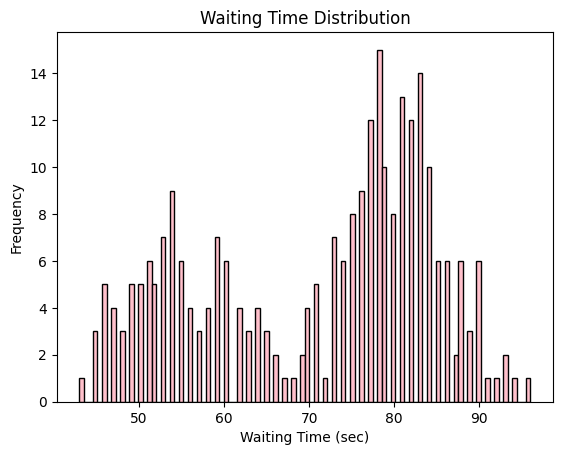

In [5]:
# Inspect histogram by numerical column
plt.hist(df['waiting'], bins=100, color='pink', edgecolor='black')

# Customize the plot
plt.title('Waiting Time Distribution')
plt.xlabel('Waiting Time (sec)')
plt.ylabel('Frequency')

plt.show()


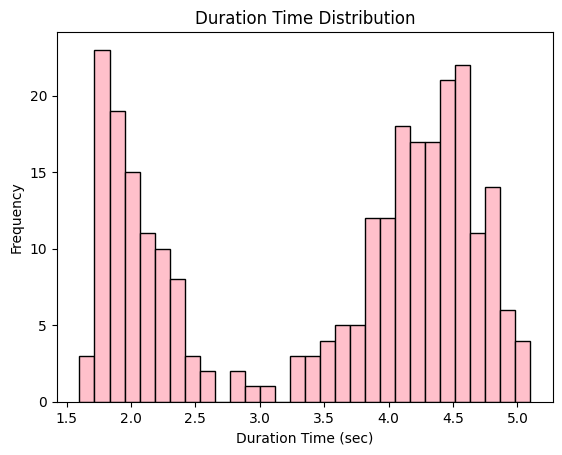

In [6]:
# Inspect histogram by numerical column
plt.hist(df['duration'], bins=30, color='pink', edgecolor='black')

# Customize the plot
plt.title('Duration Time Distribution')
plt.xlabel('Duration Time (sec)')
plt.ylabel('Frequency')

plt.show()

### **Inspecting and Comparing all Columns**

The waiting time distribution appears to have one peak whereas the duration distribution appears to have two peaks.

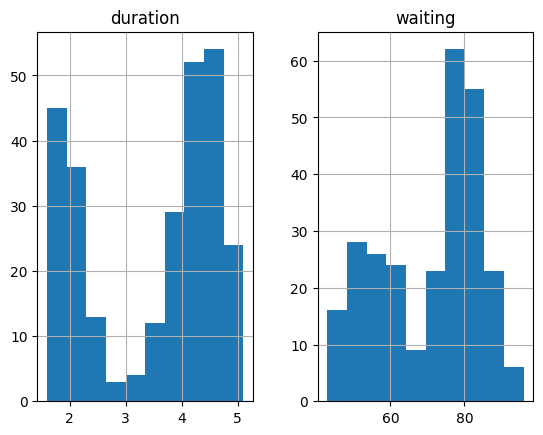

In [7]:
# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

### **Analyzing Geyser Types**

There are 2 geyser types:
* long
* short

Long geysers are represented more frequently in the dataset than short geysers, long geysers compose 63% of the dataset whereas short geysers compose 37%.

In [11]:
# Inspect value counts by categorical column
df['kind'].value_counts()

kind
long     172
short    100
Name: count, dtype: int64

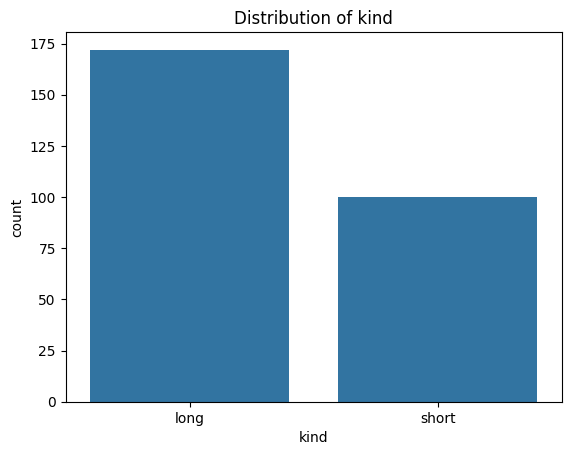

In [12]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()

### **Performing Data Transformations**

All columns are renamed with the correct capitalization and specificity.

In [13]:
# Renaming a column
df.rename(columns={'waiting': 'Geyser Waiting Time',
                   'duration': 'Geyser Duration Time',
                   'kind': 'Geyser Kind',}, inplace=True)
print(df.columns)

Index(['Geyser Duration Time', 'Geyser Waiting Time', 'Geyser Kind'], dtype='object')


Adding new columns for more information.

In [14]:
# Adding new columns
df['Time Difference'] = df['Geyser Waiting Time'] - df['Geyser Duration Time']

print(df.columns)

Index(['Geyser Duration Time', 'Geyser Waiting Time', 'Geyser Kind',
       'Time Difference'],
      dtype='object')


**Updated Dataset:**

In [15]:
print(df.head(10))

   Geyser Duration Time  Geyser Waiting Time Geyser Kind  Time Difference
0                 3.600                   79        long           75.400
1                 1.800                   54       short           52.200
2                 3.333                   74        long           70.667
3                 2.283                   62       short           59.717
4                 4.533                   85        long           80.467
5                 2.883                   55       short           52.117
6                 4.700                   88        long           83.300
7                 3.600                   85        long           81.400
8                 1.950                   51       short           49.050
9                 4.350                   85        long           80.650


There is an average time difference of 67 seconds between waiting time for a geyser versus duration time.

In [17]:
print(df.describe())

       Geyser Duration Time  Geyser Waiting Time  Time Difference
count            272.000000           272.000000       272.000000
mean               3.487783            70.897059        67.409276
std                1.141371            13.594974        12.576582
min                1.600000            43.000000        41.017000
25%                2.162750            58.000000        56.141750
50%                4.000000            76.000000        71.333500
75%                4.454250            82.000000        77.392000
max                5.100000            96.000000        90.900000


### **Visualizing Data for Long and Short Geysers Combined**

#### **Goal**

The goal of this chart is to investigate the correlation for geyser waiting time and geyser duration time and whether it is high or low.

#### **Charts**

This information has been displayed using a correlation matrix.

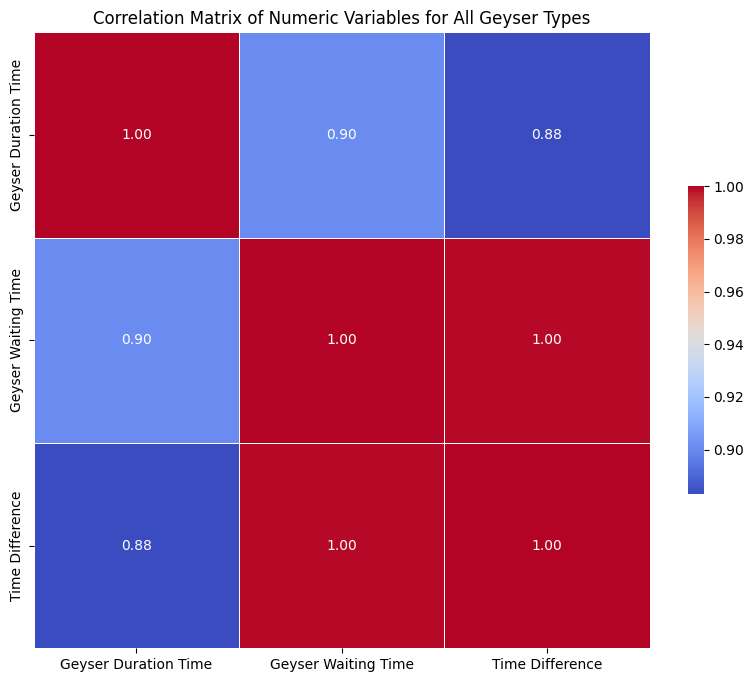

In [18]:
# Select only the numeric columns for the correlation calculation
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for All Geyser Types')
plt.show()

This information has been displayed using a pairplot chat.

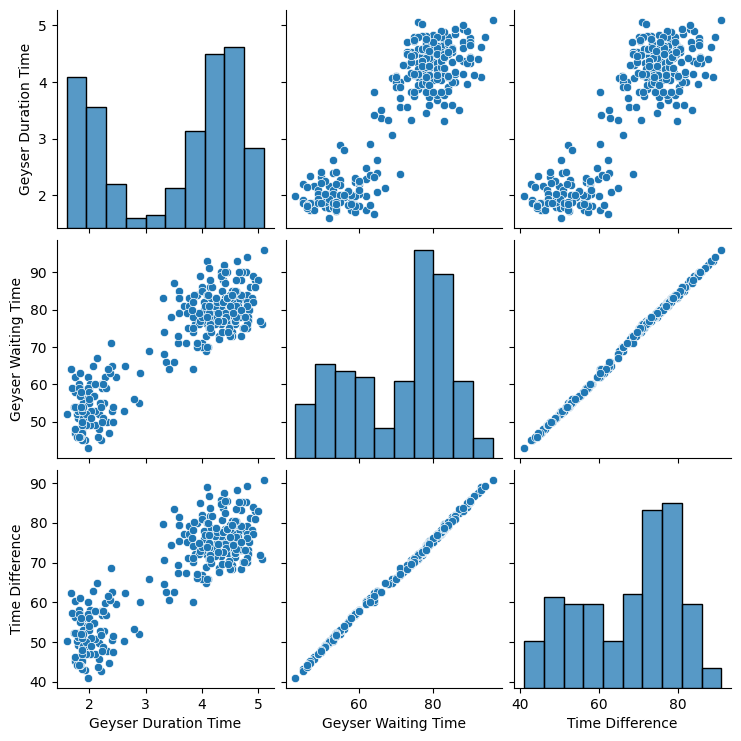

In [31]:
# Generate a pairplot
pairplot_fig = sns.pairplot(df)
plt.show()

#### **Observations**

The correlation for geyser waiting time and geyser duration time is is 0.90. This shows a high correlation between the two times implying that higher wait times lead to higher duration times.

### **Visualizing Data for Long Geysers**

#### **Goal**

The goal of this chart is to investigate the correlation for geyser waiting time and geyser duration time and whether it is high or low for long geysers.

#### **Chart**

This information has been displayed using a correlation matrix.

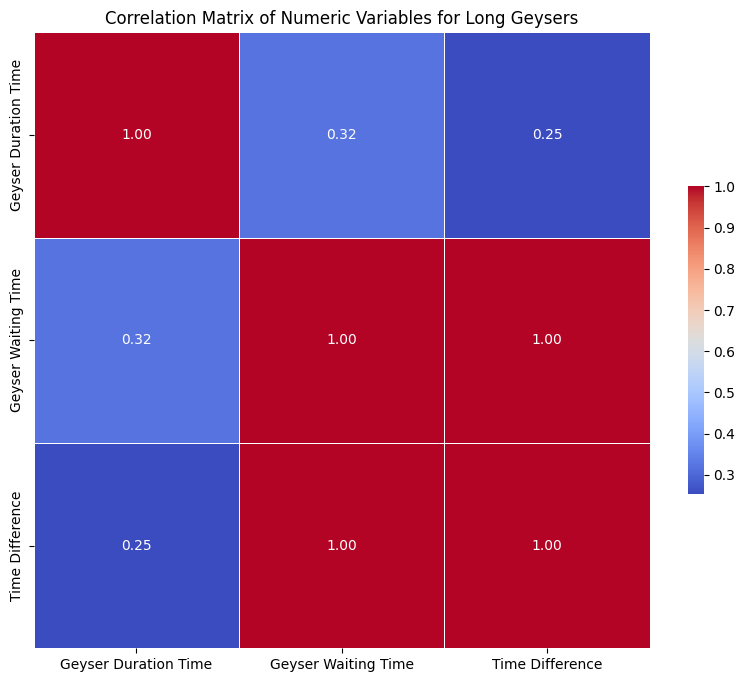

In [21]:
# Filter the DataFrame for 'setosa' species
long = df[df['Geyser Kind'] == 'long']
numeric_long = long.select_dtypes(include=[float, int])
corr_long = numeric_long.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_long, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for Long Geysers')
plt.show()

#### **Observations**

The correlation for geyser waiting time and geyser duration time is is 0.32 for long geysers. This shows a *low* correlation between the two times implying that higher wait times don't necessarily lead to higher duration times for long geysers. This is intriguing because it's the *opposite* of what we saw for the correlation of both geyser durations combined.

#### **Short Geyser Analysis**

#### **Goal**

The goal of this chart is to investigate the correlation for geyser waiting time and geyser duration time and whether it is high or low for short geysers.

#### **Chart**

This information has been displayed using a correlation matrix.

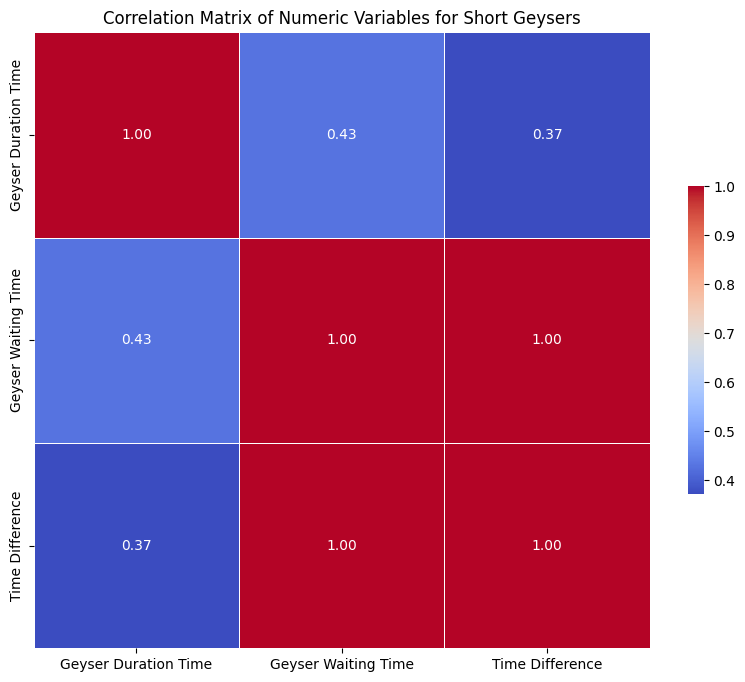

In [28]:
# Filter the DataFrame for 'versicolor' species
short = df[df['Geyser Kind'] == 'short']
numeric_short = short.select_dtypes(include=[float, int])
corr_short = numeric_short.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))
sns.heatmap(corr_short, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Numeric Variables for Short Geysers')
plt.show()

#### **Observations**

The correlation for geyser waiting time and geyser duration time is is 0.43 for short geysers. This shows a *low* correlation between the two times implying that higher wait times don't necessarily lead to higher duration times for long geysers. This is intriguing because it's the opposite of what we saw for the correlation of both geyser durations combined.